<a href="https://colab.research.google.com/github/veer71/uefa/blob/main/champions_league_19_20_group_standings_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](http://www.sabcnews.com/sabcnews/wp-content/uploads/2018/10/SABC-News-UEFA_UEFA-website.png)


In this study, I will try to predict the match outcomes, thus the group standings in UEFA Champions League season 2019-2020 by developing a statistical model that uses player (actually team) ratings to determine the outcome of the match.

**1. Databases to be used:** 
* FIFA 19 player dataset
* FIFA 20 player dataset
* 2018-2019 match results from top European Leagues (~3000 matches)

**2. Models to be developed:** 
* A predictor model will be developed using 2018-2019 match results and player dataset (actually we will be constructing team dataset using player attributes)
* After the model is complete it will be used to predict Champions League match outcomes using FIFA 20 player dataset
* My approach will be on categorisation of match outcomes (Home, Away, Draw) thus I will test KNN (yet I will not test other algorithms for this particular project)

**3. Expected results:** 
* At the end of this study, we will have group standings predictions for each group in UEFA Champions League 2019/2020 season


Let's begin to see if your favorite team will be able to make the second round this year! 

In [ ]:
# *Import libraries*
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mat
# *Import FIFA 2019 and FIFA 20 dataset. We need to identify the shared columns between the database to make sure that they exactly match*
fifa19= pd.read_csv('fifa19_data.csv')
fifa20 = pd.read_csv("fifa20_data.csv")

/home/machine/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (74) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Take a brief look at the data, using head and info functions

In [ ]:
fifa20.columns

Index(['Name', 'Image', 'Country', 'Position', 'Age', 'Overall', 'Potential',
       'Club', 'ID', 'Height', 'Weight', 'foot', 'BOV', 'BP', 'Growth',
       'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')

In [ ]:
fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
fifa20.head()

,Name,Image,Country,Position,Age,Overall,Potential,Club,ID,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,https://cdn.sofifa.org/players/4/20/158023.png,Argentina,"RW,CF,ST",32,94,94,FC Barcelona,158023,"5'7""",...,Medium,Low,5,87,92,92,96,39,66,585
1,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.org/players/4/20/20801.png,Portugal,"ST,LW",34,93,93,Juventus,20801,"6'2""",...,High,Low,5,90,93,82,89,35,78,448
2,Neymar da Silva Santos Jr.,https://cdn.sofifa.org/players/4/20/190871.png,Brazil,"LW,CAM",27,92,92,Paris Saint-Germain,190871,"5'9""",...,High,Medium,5,91,85,87,95,32,58,432
3,Jan Oblak,https://cdn.sofifa.org/players/4/20/200389.png,Slovenia,GK,26,91,91,Atlético Madrid,200389,"6'2""",...,Medium,Medium,3,87,92,78,89,52,90,240
4,Kevin De Bruyne,https://cdn.sofifa.org/players/4/20/192985.png,Belgium,"CAM,CM",28,91,91,Manchester City,192985,"5'11""",...,High,High,4,76,86,92,86,61,78,298


In [ ]:
fifa19.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


As you can see above, there are many attributes attached to a player. I will use those attributes to determine clubs' attrivbutes, basically taking an average of each attribute of each player. This seems straightforward however this will be a basic model, the further study could be done on how to determine the club's attributes better. 

Firstly for the sake of simplicity, I will remove some of the columns from the table that I plan not to use in my model. Secondly, I will need to make sure that all the columns in FIFA 19 and FIFA 20 datasets should match, thus I will only keep the columns existing in each table.

In [ ]:
fifa19=fifa19.drop(fifa19[['ID','Unnamed: 0','Value','Height','Weight','Wage','Weak Foot','Special','Preferred Foot','Skill Moves','Work Rate','Body Type','Photo','Nationality','Flag','Club Logo','Real Face','Jersey Number','Joined','Loaned From','Contract Valid Until','Release Clause']],axis=1)

KeyError: "['Unnamed: 0', 'Weak Foot', 'Special', 'Preferred Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Photo', 'Nationality', 'Flag', 'Club Logo', 'Real Face', 'Jersey Number', 'Loaned From', 'Contract Valid Until'] not in index"

In [ ]:
difcol20 = fifa20.columns.difference(fifa19.columns)
difcol19 = fifa19.columns.difference(fifa20.columns)

In [ ]:
fifa20.columns.difference(fifa19.columns).isna()

array([], dtype=bool)

In [ ]:
fifa19.columns.difference(fifa20.columns).isna()

array([], dtype=bool)

So we see that there are two different cases there:
* Some columns that exists in FIFA 19 do not exist in FIFA 20 (and vice versa)
* Some columns are named differently in two databases

Thus, we need to first eliminate the ones that makes the difference, then rename FIFA 20 columns according to FIFA 19 dataset

In [ ]:
fifa20.rename(columns={'Ball Control': 'BallControl', 'FK Accuracy': 'FKAccuracy','GK Diving':'GKDiving','GK Handling':'GKHandling','GK Positioning':'GKPositioning','GK Reflexes':'GKReflexes','Heading Accuracy':'HeadingAccuracy','Short Passing':'ShortPassing','Shot Power':'ShotPower','Sliding Tackle':'SlidingTackle','Sprint Speed':'SprintSpeed','Standing Tackle':'StandingTackle','Long Passing':'LongPassing','Long Shots':'LongShots'}, inplace=True)
fifa20=fifa20.drop(fifa20[fifa20.columns.difference(fifa19.columns)],axis=1)
fifa19=fifa19.drop(fifa19[fifa20.columns.difference(fifa19.columns)],axis=1)

In [ ]:
fifa20.columns

Index(['Name', 'Position', 'Age', 'Overall', 'Potential', 'Club', 'ID',
       'Height', 'Weight', 'Joined', 'Value', 'Wage', 'Release Clause',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [ ]:
fifa19.columns

Index(['ID', 'Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Position', 'Joined', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [ ]:
fifa20.columns.difference(fifa19.columns).isna()

array([], dtype=bool)

In [ ]:
fifa19.columns.difference(fifa20.columns).isna()

array([], dtype=bool)

I would like to keep goalkeeper statistics separate to calculate the overall of the clubs. Thus, I will categorise players into:
- Goalkeepers
- Others

Then, each player will have a new position and we will remove all other stats that belong to Position.

In [ ]:
fifa19['New Position']=0
fifa19['New Position'][fifa19['Position']=='GK']='GK'
fifa20['New Position']=0
fifa20['New Position'][fifa20['Position']=='GK']='GK'

/tmp/ipykernel_1888941/2369566539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa19['New Position'][fifa19['Position']=='GK']='GK'
/tmp/ipykernel_1888941/2369566539.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa20['New Position'][fifa20['Position']=='GK']='GK'


Now I have the attributes that I plan to use in my models. What we need to do next is to group the player stats under teams - so building team attributes. For this, I will use .mean() function to get a team's overall attributes for each position.

For all statistics, I will divide positions as Goalkeeper and Non-Goalkeepers into two tables, then I will merge them into one

In [ ]:
gk19 = fifa19[fifa19['New Position']=='GK']
gk20 = fifa20[fifa20['New Position']=='GK']

In [ ]:
gk20.head()

,Name,Position,Age,Overall,Potential,Club,ID,Height,Weight,Joined,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKPositioning,GKReflexes,New Position
3,Jan Oblak,GK,26,91,91,Atlético Madrid,200389,"6'2""",192lbs,"Jul 16, 2014",...,11,68,27,12,18,87,92,90,89,GK
8,Marc-André ter Stegen,GK,27,90,90,FC Barcelona,192448,"6'2""",187lbs,"Jul 1, 2014",...,25,70,25,13,10,88,85,88,90,GK
12,Alisson Ramses Becker,GK,26,89,89,Liverpool,212831,"6'3""",201lbs,"Jul 19, 2018",...,23,65,15,19,16,85,84,90,89,GK
16,David De Gea Quintana,GK,28,89,89,Manchester United,193080,"6'4""",181lbs,"Jul 1, 2011",...,29,68,25,21,13,90,84,85,92,GK
24,Ederson Santana de Moraes,GK,25,88,88,Manchester City,210257,"6'2""",190lbs,"Jul 1, 2017",...,17,70,29,15,8,86,82,86,88,GK


In [ ]:
gk19.head()

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Position,Joined,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKPositioning,GKReflexes,Release Clause,New Position
3,193080,De Gea,27,91,93,Manchester United,€72M,€260K,GK,"Jul 1, 2011",...,68.0,15.0,21.0,13.0,90.0,85.0,88.0,94.0,€138.6M,GK
9,200389,J. Oblak,25,90,93,Atlético Madrid,€68M,€94K,GK,"Jul 16, 2014",...,70.0,27.0,12.0,18.0,86.0,92.0,88.0,89.0,€144.5M,GK
18,192448,M. ter Stegen,26,89,92,FC Barcelona,€58M,€240K,GK,"Jul 1, 2014",...,69.0,25.0,13.0,10.0,87.0,85.0,85.0,90.0,€123.3M,GK
19,192119,T. Courtois,26,89,90,Real Madrid,€53.5M,€240K,GK,"Aug 9, 2018",...,66.0,20.0,18.0,16.0,85.0,91.0,86.0,88.0,€113.7M,GK
22,167495,M. Neuer,32,89,89,FC Bayern München,€38M,€130K,GK,"Jul 1, 2011",...,70.0,17.0,10.0,11.0,90.0,86.0,87.0,87.0,€62.7M,GK


I'll need to eliminate attributes not attached to goal keeping

In [ ]:
gk19 = gk19.drop(['Name','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
              'LongPassing','BallControl','Acceleration','SprintSpeed', 'Agility', 'Balance', 'ShotPower',
              'LongShots','Interceptions','Positioning','Vision','Penalties','Marking','StandingTackle','SlidingTackle',
             'Aggression','Stamina'],
            axis=1)

gk20 = gk20.drop(['Name','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
              'LongPassing','BallControl','Acceleration','SprintSpeed', 'Agility', 'Balance', 'ShotPower',
              'LongShots','Interceptions','Positioning','Vision','Penalties','Marking','StandingTackle','SlidingTackle',
             'Aggression','Stamina'],
            axis=1)

I also want to keep keeper statistics different than the other players, so I will add 'GK' to the beginning of each attribute

In [ ]:
gk19.columns = [str(col) + " GK" for col in gk19.columns]
gk19['Club']=gk19['Club GK']
gk19=gk19.drop(['Club GK'],axis=1)
gk20.columns = [str(col) + " GK" for col in gk20.columns]
gk20['Club']=gk20['Club GK']
gk20=gk20.drop(['Club GK'],axis=1)

/tmp/ipykernel_1888941/2009265803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk19['Club']=gk19['Club GK']
/tmp/ipykernel_1888941/2009265803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk20['Club']=gk20['Club GK']


It seems like we have chosen the right attributes for the goalkeepers, now it is time to grouping each player under the teams. We will get means for each team.

In [ ]:
gk19teams = gk19.groupby('Club').mean().sort_values('Overall GK',ascending=False)
gk20teams = gk20.groupby('Club').mean().sort_values('Overall GK',ascending=False)

,ID GK,Age GK,Overall GK,Potential GK,Crossing GK,Finishing GK,HeadingAccuracy GK,ShortPassing GK,Volleys GK,Dribbling GK,...,Vision GK,Penalties GK,Composure GK,Marking GK,StandingTackle GK,SlidingTackle GK,GKDiving GK,GKHandling GK,GKPositioning GK,GKReflexes GK
Club,,,,,,,,,,,,,,,,,,,,,
Manchester United,140064.000000,31.0,81.666667,82.333333,15.666667,14.666667,15.666667,44.000000,15.000000,13.666667,...,57.666667,25.333333,63.333333,13.666667,15.000000,15.666667,80.666667,77.666667,79.666667,84.000000
Juventus,191168.000000,27.0,80.333333,82.666667,12.000000,11.333333,13.666667,29.666667,13.666667,16.000000,...,42.333333,20.333333,64.666667,20.000000,12.333333,14.666667,80.000000,78.666667,79.333333,84.333333
Arsenal,148104.666667,29.0,79.333333,82.000000,16.666667,12.333333,19.333333,35.666667,16.666667,13.666667,...,52.333333,29.333333,60.666667,16.666667,16.000000,16.666667,78.333333,77.666667,79.333333,78.333333
Real Madrid,200778.750000,27.0,79.250000,81.750000,15.250000,12.750000,12.250000,28.750000,10.250000,12.750000,...,52.250000,23.500000,57.250000,21.750000,14.500000,13.500000,78.500000,78.250000,77.750000,79.000000
Villarreal CF,156001.666667,31.0,78.666667,79.000000,17.666667,12.666667,12.666667,37.333333,13.333333,14.666667,...,42.333333,20.000000,58.666667,19.666667,14.666667,13.333333,80.666667,75.666667,76.333333,80.000000


In [ ]:
# subset for the players who are not GKs
notgk19 = fifa19[fifa19['New Position']!='GK']
notgk20 = fifa20[fifa20['New Position']!='GK']

# dropping GK skills from the table
notgk19 = notgk19.drop(['Name','GKDiving','GKHandling','GKPositioning','GKReflexes'],axis=1)
notgk20 = notgk20.drop(['Name','GKDiving','GKHandling','GKPositioning','GKReflexes'],axis=1)

notgk19teams = notgk19.groupby('Club').mean().sort_values('Overall',ascending=False)
notgk20teams = notgk20.groupby('Club').mean().sort_values('Overall',ascending=False)

# grouping the both tables into one
teams19=pd.merge(notgk19teams,gk19teams,'right','Club')
teams20=pd.merge(notgk20teams,gk20teams,'right','Club')

Now we have the aggregate stats for 651 teams on FIFA 19

We have the results from the following leagues. The main reason choosing these leagues due to ability to find relevant statistics and the fact that Champions League includes most of its participants from those countries:
* English Premier League
* La Liga
* Serie A
* Bundesliga
* Belgium Pro League
* France Ligue 1
* Eredivisie
* Primeira Liga
* Turkish Super Lig

First, we will read the data to dataframes and manipulate. The team names in the following databases are already changed to their FIFA Names to ensure uniqueness (for example 'Man United' in results database changed to 'Manchester United' as it is appeared in FIFA 19 database).

In [ ]:
uk = pd.read_csv('UK.csv',sep=';',encoding='latin-1')
es = pd.read_csv('ES.csv',sep=';',encoding='latin-1')
it = pd.read_csv('IT.csv',sep=';',encoding='latin-1')
de = pd.read_csv('DE.csv',sep=';',encoding='latin-1')
be = pd.read_csv('BE.csv',sep=';',encoding='latin-1')
fr = pd.read_csv('FR.csv',sep=';',encoding='latin-1')
ne = pd.read_csv('NE.csv',sep=';',encoding='latin-1')
pt = pd.read_csv('PO.csv',sep=';',encoding='latin-1')
tr = pd.read_csv('TR.csv',sep=';',encoding='latin-1')

In [ ]:
uk.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10.08.2018,Manchester United,Leicester City,2,1,H,1,0,H,...,Oca.79,17,-0.75,Oca.75,1.Tem,Þub.29,Þub.21,Oca.55,4.Tem,Tem.69
1,E0,11.08.2018,Bournemouth,Cardiff City,2,0,H,1,0,H,...,Oca.83,20,-0.75,2.Þub,Þub.13,1.Aðu,Oca.75,Oca.88,Mar.61,4.Tem
2,E0,11.08.2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,Oca.87,22,-0.25,Þub.18,2.Kas,Oca.81,Oca.77,Þub.62,Mar.38,2.Eyl
3,E0,11.08.2018,Huddersfield Town,Chelsea,0,3,A,0,2,A,...,Oca.84,23,1,Oca.84,1.Aðu,Þub.13,2.Haz,Tem.24,Mar.95,Oca.58
4,E0,11.08.2018,Newcastle United,Tottenham Hotspur,1,2,A,1,2,A,...,Oca.81,20,0.25,2.Þub,2.Ara,1.Aðu,Oca.76,Nis.74,Mar.53,Oca.89


I will only use HomeTeam, AwayTeam, FTHG (Full Team Home Goals), FTAG (Full Time Away Goals), FTR (Full Time Result) from all divisions. Thus, I will drop all the remaining columns from the database

In [ ]:
allres = uk.append([be,de,tr,es,ne,fr,pt,it])
allres['Div'].unique()
# dropping remaining columns
allres=allres[['HomeTeam','AwayTeam','FTHG','FTAG','FTR']]
allres.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Manchester United,Leicester City,2,1,H
1,Bournemouth,Cardiff City,2,0,H
2,Fulham,Crystal Palace,0,2,A
3,Huddersfield Town,Chelsea,0,3,A
4,Newcastle United,Tottenham Hotspur,1,2,A


So all the divisions are there, let's take out the other columns that we will not use

Here we can see that there are 2984 matches played in these leagues in 2018/2019 season. It is a good sample size. Now I want to integrate the attributes from FIFA 19 database to match results dataframe. My problem for this is that the team names do not match, so I need to convert the team names in results to that of FIFA 19 team names. I have done it manually on my database that includes the match results from different leagues. Thus I have the exact same names for two databases.

My first plan to firstly integrate the team attributes for home team and then the away team. Thus I need to make a copy of FIFA 19 dataset for each and name the each column of two different dataset adding a 'Home' and 'Away' prefix

In [ ]:
HomeStats = teams19
HomeStats = HomeStats.add_prefix('Home ')
HomeStats = HomeStats.reset_index()
AwayStats = teams19
AwayStats = AwayStats.add_prefix('Away ')
AwayStats = AwayStats.reset_index()

# Combining the stats of both Home team and away team into a single table
res1 = pd.merge(allres,HomeStats,'left',left_on='HomeTeam',right_on='Club')
alltable = pd.merge(res1, AwayStats, 'left',left_on='AwayTeam',right_on='Club')

# check for unique values in the dataframe
alltable[alltable['Club_x'].isna()]['HomeTeam'].unique()

So we see that there are some teams their names do not match with FIFA database, we need to make sure that they have the same name in both database.

In [ ]:
allres['HomeTeam'] = allres['HomeTeam'].replace('FC Schalke 04 04', 'FC Schalke 04')
allres['AwayTeam'] =  allres['AwayTeam'].replace('FC Schalke 04 04', 'FC Schalke 04')
allres['HomeTeam'] =  allres['HomeTeam'].replace('Medipol Baþakþehir FK', 'Medipol Başakşehir FK')
allres['AwayTeam'] =  allres['AwayTeam'].replace('Medipol Baþakþehir FK', 'Medipol Başakşehir FK')
allres['HomeTeam'] = allres['HomeTeam'].replace('Beþiktaþ JK', 'Beşiktaş JK')
allres['AwayTeam'] = allres['AwayTeam'].replace('Beþiktaþ JK', 'Beşiktaş JK')
allres['HomeTeam'] = allres['HomeTeam'].replace('Sociedad', 'Real Sociedad')
allres['AwayTeam'] = allres['AwayTeam'].replace('Sociedad', 'Real Sociedad')
allres['HomeTeam'] = allres['HomeTeam'].replace('Spal', 'SPAL')
allres['AwayTeam'] = allres['AwayTeam'].replace('Spal', 'SPAL')
allres['HomeTeam'] = allres['HomeTeam'].replace('Kasimpaþa SK', 'Kasimpaşa SK')
allres['AwayTeam'] = allres['AwayTeam'].replace('Kasimpaþa SK', 'Kasimpaşa SK')

In [ ]:
res1 = pd.merge(allres,HomeStats,'left',left_on='HomeTeam',right_on='Club')
alltable2 = pd.merge(res1, AwayStats, 'left',left_on='AwayTeam',right_on='Club')

Another run to see if there is any NaN value left

In [ ]:
alltable2[alltable2['Club_x'].isna()] ['Club_x'].unique()

(0,)

In [ ]:
alltable2[alltable2['Club_y'].isna()]['Club_y'].unique()

array([], dtype=object)

Phew! Finally the data seems clear and good to go. Here is the description of the data

In [ ]:
alltable2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984 entries, 0 to 2983
Columns: 121 entries, HomeTeam to Away GKReflexes GK
dtypes: float64(114), int64(2), object(5)
memory usage: 2.8+ MB


Now remove club names from the table to just to have the pure data for the remaining part of the process. Also, we'll categorize of match results: Home Win as 1, Away Win as 2, Draw as 0.

In [ ]:
table = alltable2.drop(columns=['HomeTeam','AwayTeam','Club_x','Club_y'])
table['FTR']= table['FTR'].replace(['H','A','D'],[1,2,0])
table.head()

,FTHG,FTAG,FTR,Home ID,Home Age,Home Overall,Home Potential,Home Crossing,Home Finishing,Home HeadingAccuracy,...,Away LongShots GK,Away Aggression GK,Away Interceptions GK,Away Positioning GK,Away Vision GK,Away Penalties GK,Away Marking GK,Away StandingTackle GK,Away SlidingTackle GK,Away GKReflexes GK
0,2,1,1,208394.333333,24.133333,76.800000,82.700000,66.900000,60.600000,66.966667,...,13.666667,35.000000,21.333333,10.333333,49.666667,22.666667,12.000000,15.333333,14.000000,79.000000
1,2,0,1,205631.310345,23.827586,69.689655,75.896552,58.379310,52.000000,57.758621,...,12.666667,28.333333,21.333333,16.666667,38.333333,29.333333,13.333333,13.333333,14.333333,71.666667
2,0,2,2,214976.500000,23.142857,69.250000,76.535714,54.000000,52.500000,59.821429,...,12.333333,22.000000,22.000000,11.666667,48.000000,22.666667,15.333333,15.000000,15.000000,74.333333
3,0,3,2,218220.793103,23.206897,69.103448,76.103448,58.551724,51.517241,62.965517,...,11.500000,24.750000,17.750000,10.750000,49.500000,19.750000,14.750000,12.750000,13.250000,73.250000
4,1,2,2,211235.206897,24.172414,70.758621,77.448276,57.620690,54.034483,62.275862,...,15.250000,27.750000,20.750000,9.250000,38.250000,33.250000,23.750000,13.500000,14.250000,77.500000


## Data Exploration

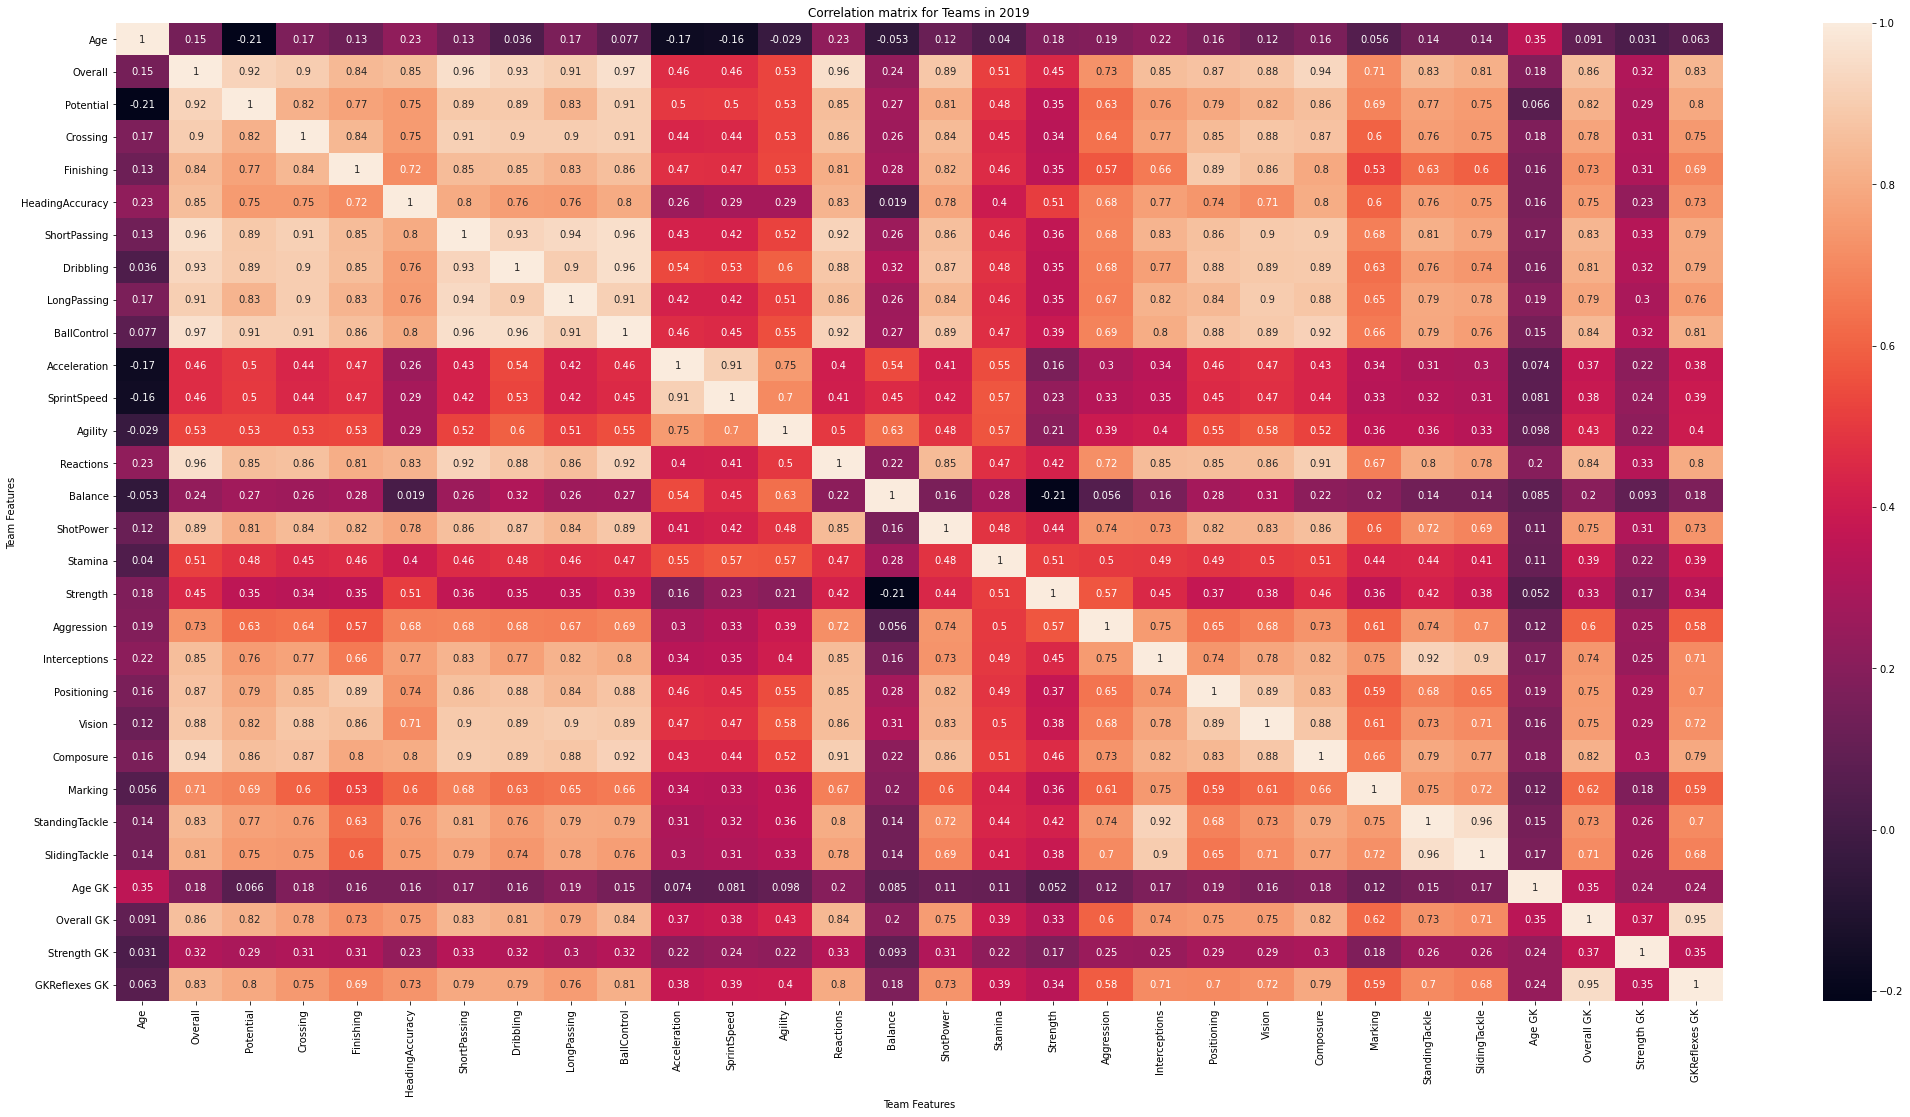

Strength        Balance          -0.212620
Balance         Strength         -0.212620
Potential       Age              -0.209267
Age             Potential        -0.209267
Acceleration    Age              -0.168604
                                    ...   
StandingTackle  StandingTackle    1.000000
SlidingTackle   SlidingTackle     1.000000
Age GK          Age GK            1.000000
Balance         Balance           1.000000
GKReflexes GK   GKReflexes GK     1.000000
Length: 900, dtype: float64

In [ ]:
corrMat19 = teams19.corr()
mat.figure(figsize=(36,18))
sns.heatmap(corrMat19, annot = True)
mat.title("Correlation matrix for Teams in 2019")
mat.xlabel("Team Features")
mat.ylabel("Team Features")
mat.savefig("CorrMatTeam19.png")
mat.show()
sortedCorrMat19 = corrMat19.unstack().sort_values(kind="quicksort")
sortedCorrMat19

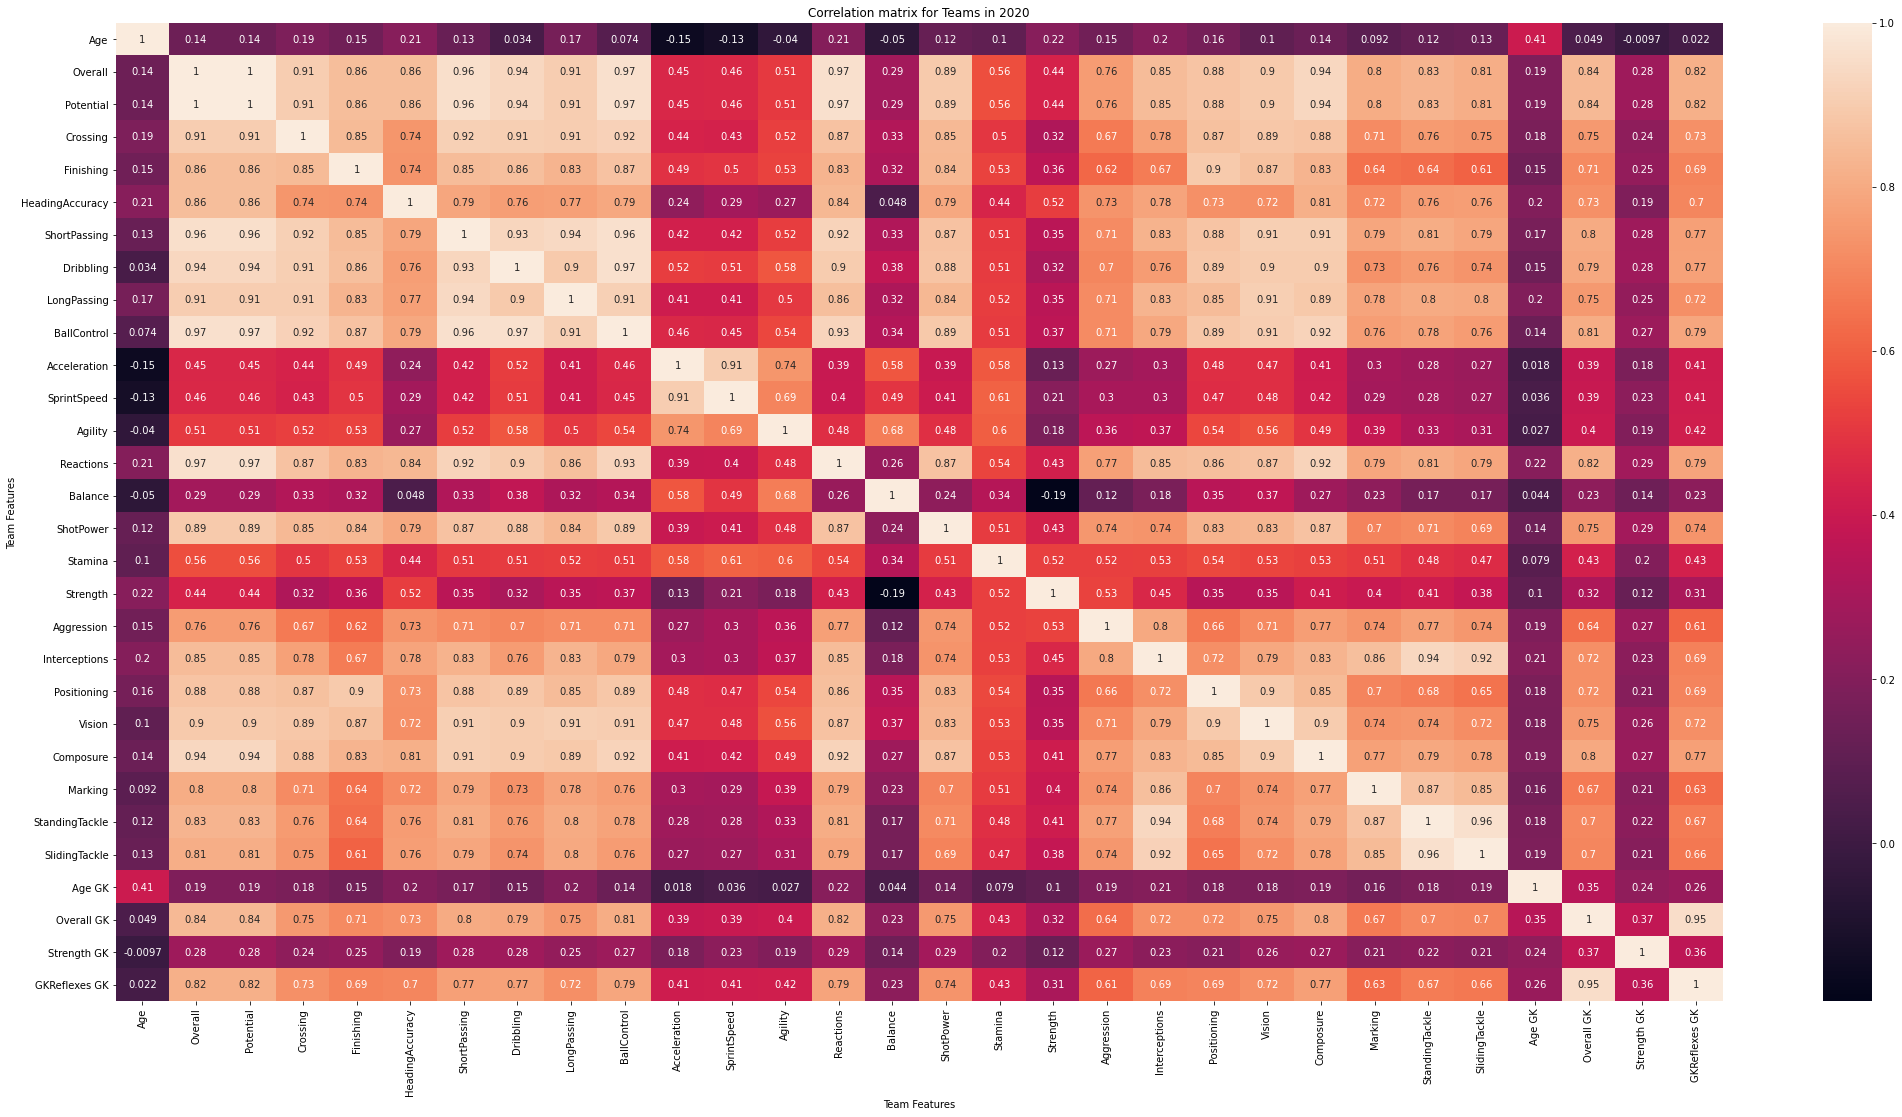

In [ ]:
corrMat20 = teams20.corr()
mat.figure(figsize=(36,18))
sns.heatmap(corrMat20, annot = True)
mat.title("Correlation matrix for Teams in 2020")
mat.xlabel("Team Features")
mat.ylabel("Team Features")
mat.savefig("CorrMatTeam20.png")
mat.show()
sortedCorrMat20 = corrMat20.unstack().sort_values(kind="quicksort")
sortedCorrMat20
np.savetxt("sortedCorrMat20.csv",sortedCorrMat20,delimiter=",")

Let's check which skills were important for the teams overall in both years.

In [ ]:
corrMat19[corrMat19>0.8]["Overall"]

Age                     NaN
Overall            1.000000
Potential          0.920535
Crossing           0.904797
Finishing          0.842356
HeadingAccuracy    0.853532
ShortPassing       0.960531
Dribbling          0.932755
LongPassing        0.908020
BallControl        0.966487
Acceleration            NaN
SprintSpeed             NaN
Agility                 NaN
Reactions          0.960407
Balance                 NaN
ShotPower          0.885579
Stamina                 NaN
Strength                NaN
Aggression              NaN
Interceptions      0.853221
Positioning        0.870733
Vision             0.884101
Composure          0.936014
Marking                 NaN
StandingTackle     0.834902
SlidingTackle      0.810941
Age GK                  NaN
Overall GK         0.861656
Strength GK             NaN
GKReflexes GK      0.832374
Name: Overall, dtype: float64

In [ ]:
corrMat20[corrMat20>0.8]["Overall"]

Age                     NaN
Overall            1.000000
Potential          1.000000
Crossing           0.906070
Finishing          0.860019
HeadingAccuracy    0.858963
ShortPassing       0.962199
Dribbling          0.938600
LongPassing        0.906285
BallControl        0.966938
Acceleration            NaN
SprintSpeed             NaN
Agility                 NaN
Reactions          0.966387
Balance                 NaN
ShotPower          0.894520
Stamina                 NaN
Strength                NaN
Aggression              NaN
Interceptions      0.851701
Positioning        0.877770
Vision             0.895917
Composure          0.937775
Marking            0.804558
StandingTackle     0.827766
SlidingTackle      0.811792
Age GK                  NaN
Overall GK         0.844252
Strength GK             NaN
GKReflexes GK      0.816436
Name: Overall, dtype: float64

Boxplotting to get the idea of the distriution for each feature

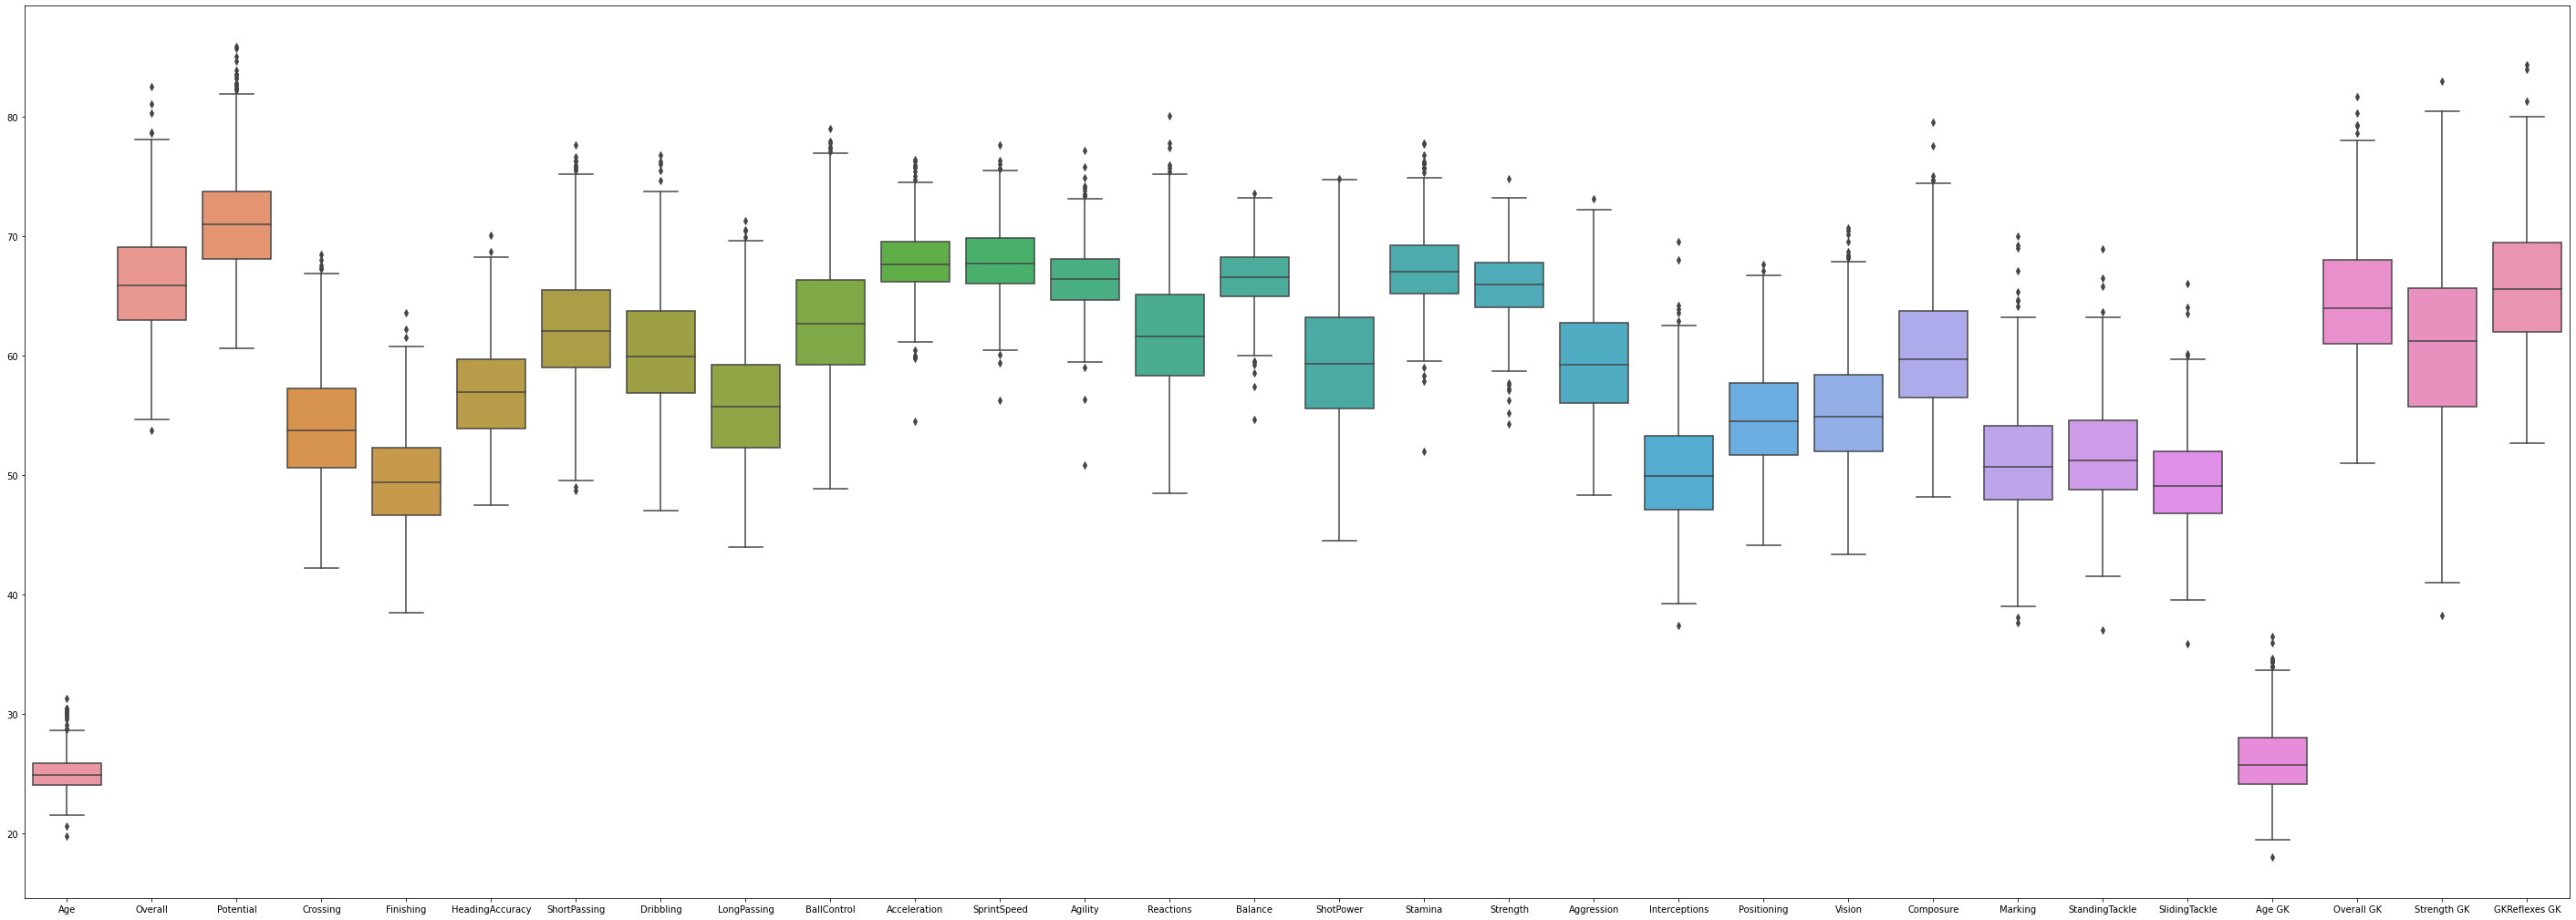

In [ ]:
mat.figure(figsize=(50,18))
sns.boxplot(data=teams19)
mat.savefig("teams19-box.png")

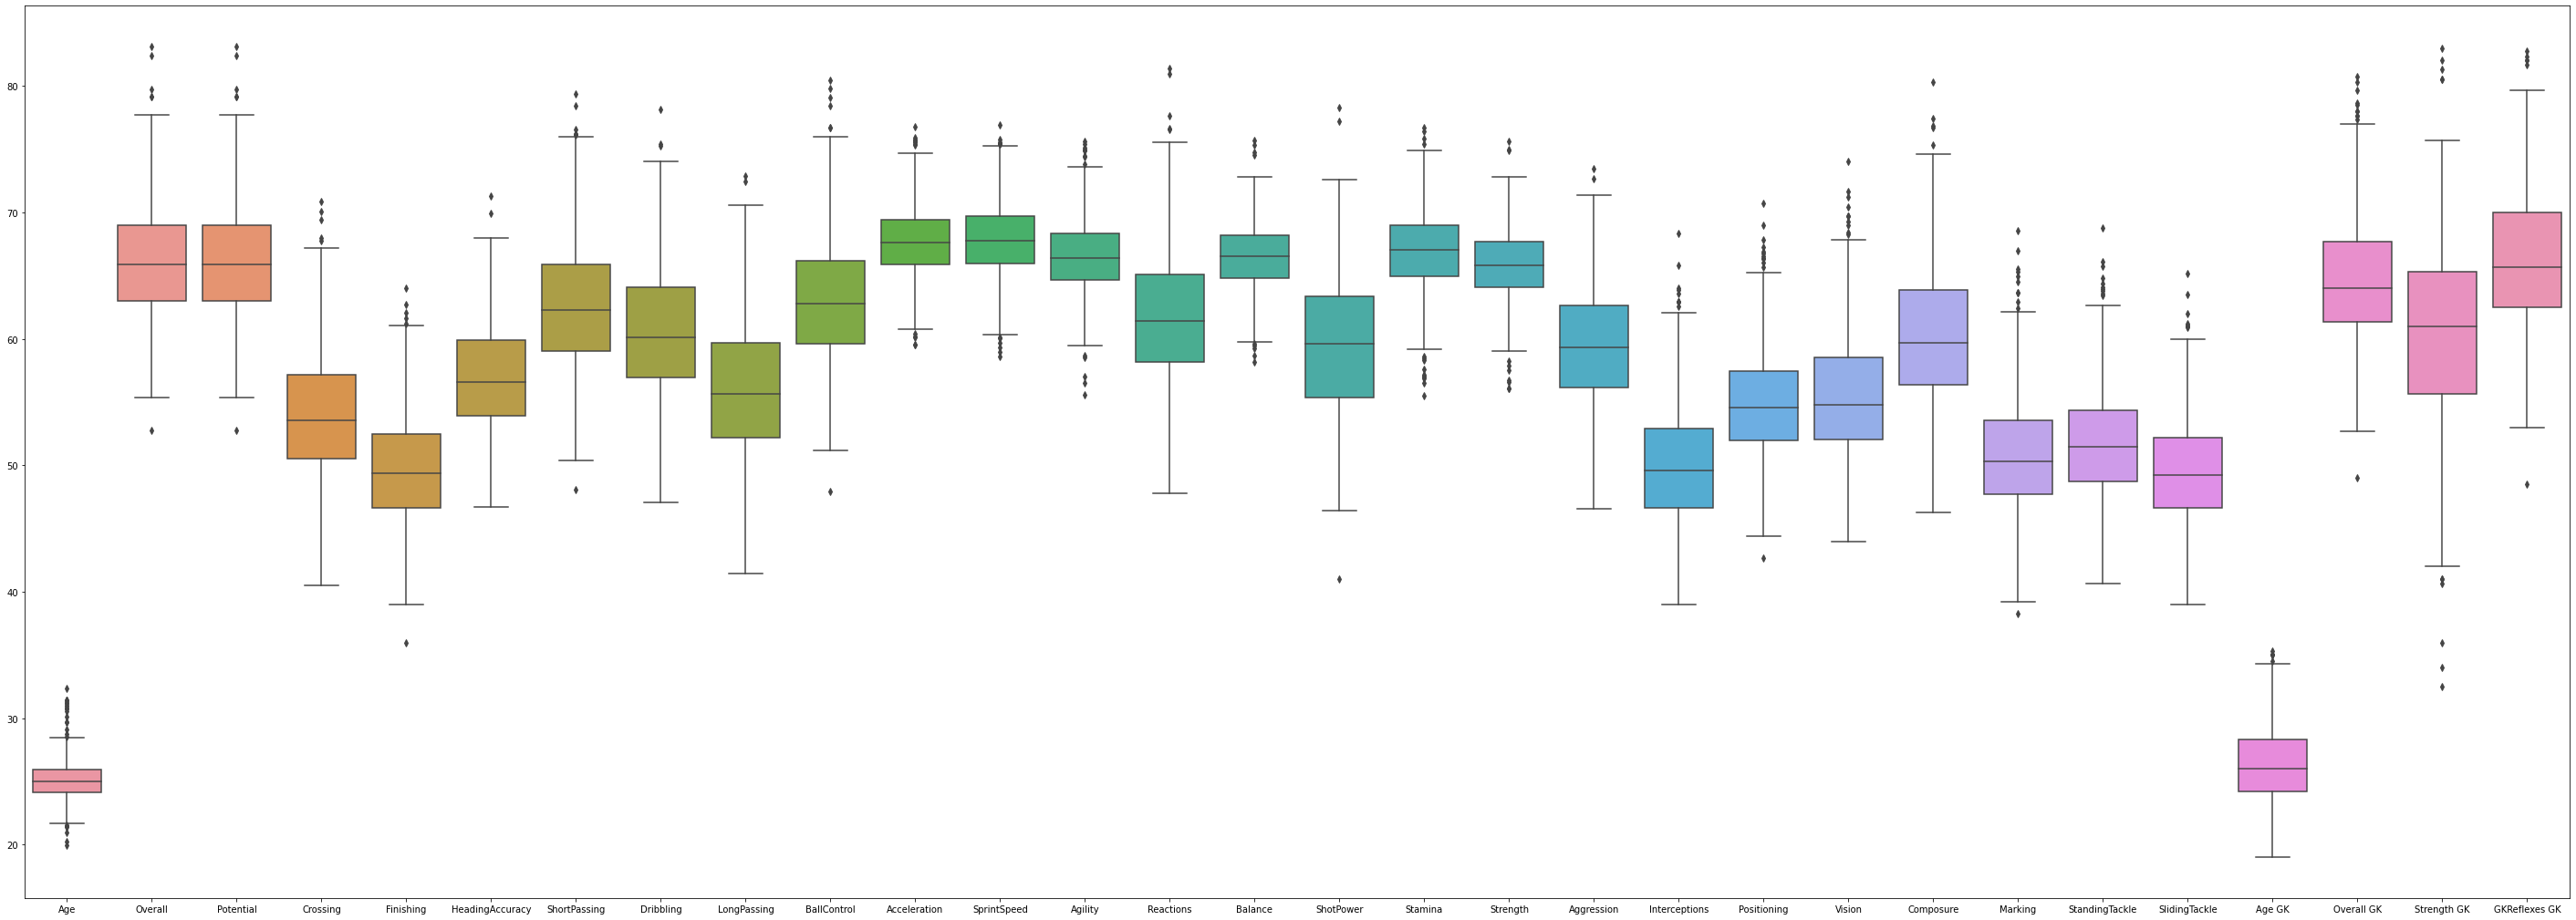

In [ ]:
mat.figure(figsize=(50,18))
sns.boxplot(data=teams20)
mat.savefig("teams20-box.png")

Now, let's compare how the overall performance of the Home and Away teams affects the match outcome.

<AxesSubplot:xlabel='Home Overall', ylabel='Away Overall'>

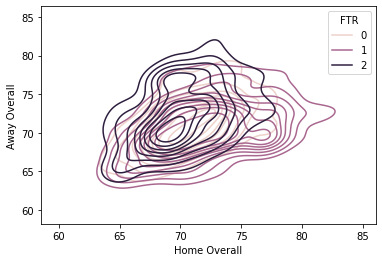

In [ ]:
sns.kdeplot(data=tablek,x="Home Overall",y="Away Overall",hue="FTR",thresh=.1,)
mat.savefig("Performance-dependence.png")

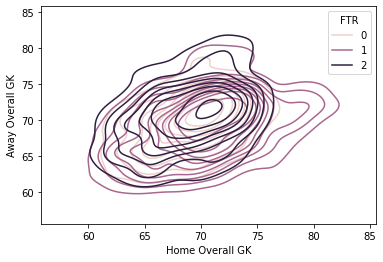

In [ ]:
sns.kdeplot(data=tablek,x="Home Overall GK",y="Away Overall GK",hue="FTR",thresh=.1,)
mat.savefig("GKPerformance-dependence.png")

The plots highlights that observations that being a home team can help with the match outcome if the team is high performing, but there is still a significant overlap between the regions 

Let's check the dependence of results on the age statistics of the Home or Away team.

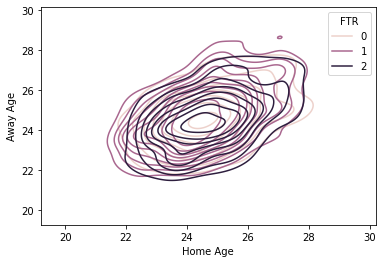

In [ ]:
sns.kdeplot(data=tablek,x="Home Age",y="Away Age",hue="FTR",thresh=.1,)
mat.savefig("Age-dependence.png")

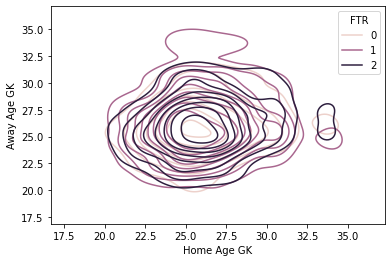

In [ ]:
sns.kdeplot(data=tablek,x="Home Age GK",y="Away Age GK",hue="FTR",thresh=.1,)
mat.savefig("GKAge-dependence.png")

I will drop Total Goals scored columns since it directly affects the outcome of the match (surprise!)

In [ ]:
tablek=table.iloc[:,2:]
tablek.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984 entries, 0 to 2983
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FTR                   2984 non-null   int64  
 1   Home Age              2984 non-null   float64
 2   Home Overall          2984 non-null   float64
 3   Home Potential        2984 non-null   float64
 4   Home Crossing         2984 non-null   float64
 5   Home Finishing        2984 non-null   float64
 6   Home HeadingAccuracy  2984 non-null   float64
 7   Home ShortPassing     2984 non-null   float64
 8   Home Dribbling        2984 non-null   float64
 9   Home LongPassing      2984 non-null   float64
 10  Home BallControl      2984 non-null   float64
 11  Home Acceleration     2984 non-null   float64
 12  Home SprintSpeed      2984 non-null   float64
 13  Home Agility          2984 non-null   float64
 14  Home Reactions        2984 non-null   float64
 15  Home Balance         

Let's first standardise the data for all the columns with numbers

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(tablek.iloc[:,1:])
tablek_feat=scaler.fit_transform(tablek.iloc[:,1:])
X = tablek_feat
y=tablek['FTR']

In [ ]:
tablek.columns

Index(['FTR', 'Home Age', 'Home Overall', 'Home Potential', 'Home Crossing',
       'Home Finishing', 'Home HeadingAccuracy', 'Home ShortPassing',
       'Home Dribbling', 'Home LongPassing', 'Home BallControl',
       'Home Acceleration', 'Home SprintSpeed', 'Home Agility',
       'Home Reactions', 'Home Balance', 'Home ShotPower', 'Home Stamina',
       'Home Strength', 'Home Aggression', 'Home Interceptions',
       'Home Positioning', 'Home Vision', 'Home Composure', 'Home Marking',
       'Home StandingTackle', 'Home SlidingTackle', 'Home Age GK',
       'Home Overall GK', 'Home Strength GK', 'Home GKReflexes GK', 'Away Age',
       'Away Overall', 'Away Potential', 'Away Crossing', 'Away Finishing',
       'Away HeadingAccuracy', 'Away ShortPassing', 'Away Dribbling',
       'Away LongPassing', 'Away BallControl', 'Away Acceleration',
       'Away SprintSpeed', 'Away Agility', 'Away Reactions', 'Away Balance',
       'Away ShotPower', 'Away Stamina', 'Away Strength', 'Away Aggres

As a next step we will split the data as train and test, using a test size of 0.3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=8)

---

## Using KNN Model

So that we have the all match data ready (around 3000 matches and 61 columns atributed a match), it is now time to build our first model. 

**Model selection:** I want to build a k-nearest neighbors model since we have the categorical data (Home, Away, Draw). Other models could be used in a further study such as linear regression to determine how many goals teams would score or decision tree models. However, I will only focus on k-nearest neighbors model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 82  85  48]
 [136 220  56]
 [ 93  66 110]]
              precision    recall  f1-score   support

           0       0.26      0.38      0.31       215
           1       0.59      0.53      0.56       412
           2       0.51      0.41      0.46       269

    accuracy                           0.46       896
   macro avg       0.46      0.44      0.44       896
weighted avg       0.49      0.46      0.47       896



With a random k value chosen as 3, we see that our accuracy is 46%. However, this is not enough grouping size when we consider the nature of kNN algorithm. A good practice of choosing k in kNN is the square root of all samples. 

On the other hand, I would like to find a near optimal value for k evaluating the error rate. Thus, I will produce a graph using a k value from 1 to 50 and see which k value will generate the least error rate.

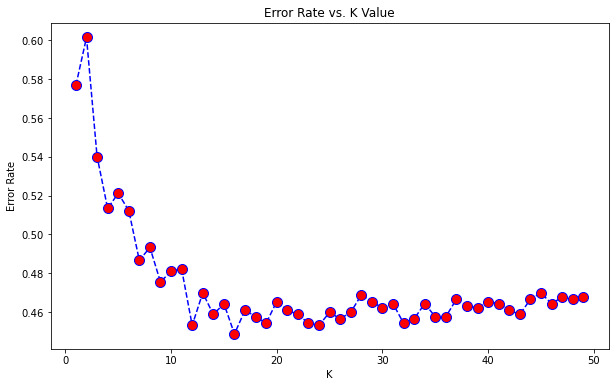

In [ ]:
error_rate=[]

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

mat.figure(figsize=(10,6))
mat.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
mat.title('Error Rate vs. K Value')
mat.xlabel('K')
mat.ylabel('Error Rate')
mat.savefig("KNN-error.png")

As we can see above, the least error rate happens in k=15. Let's also take a look at the accuracy of our model according to changing k values:

[0.42299107142857145, 0.3984375, 0.45982142857142855, 0.48660714285714285, 0.47879464285714285, 0.4877232142857143, 0.5133928571428571, 0.5066964285714286, 0.5245535714285714, 0.5189732142857143, 0.5178571428571429, 0.546875, 0.5301339285714286, 0.5412946428571429, 0.5357142857142857, 0.5513392857142857, 0.5390625, 0.5424107142857143, 0.5457589285714286, 0.5345982142857143, 0.5390625, 0.5412946428571429, 0.5457589285714286, 0.546875, 0.5401785714285714, 0.5435267857142857, 0.5401785714285714, 0.53125, 0.5345982142857143, 0.5379464285714286, 0.5357142857142857, 0.5457589285714286, 0.5435267857142857, 0.5357142857142857, 0.5424107142857143, 0.5424107142857143, 0.5334821428571429, 0.5368303571428571, 0.5379464285714286, 0.5345982142857143, 0.5357142857142857, 0.5390625, 0.5412946428571429, 0.5334821428571429, 0.5301339285714286, 0.5357142857142857, 0.5323660714285714, 0.5334821428571429, 0.5323660714285714]


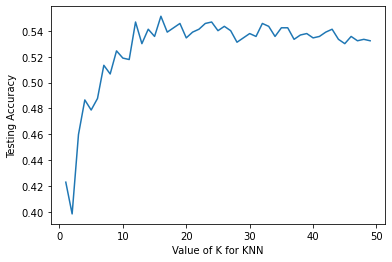

In [ ]:
from sklearn import metrics
k_range= range(1,50)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

mat.plot(k_range, scores)
mat.xlabel('Value of K for KNN')
mat.ylabel('Testing Accuracy')
mat.savefig("KNN-accuracy.png")

As expected, the highest accuracy happens in k=15. Thus, I will fit my model using k=15:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 44 110  61]
 [ 50 307  55]
 [ 38 102 129]]
              precision    recall  f1-score   support

           0       0.33      0.20      0.25       215
           1       0.59      0.75      0.66       412
           2       0.53      0.48      0.50       269

    accuracy                           0.54       896
   macro avg       0.48      0.48      0.47       896
weighted avg       0.51      0.54      0.51       896



From the confusion matrix above, we see that our model's accuracy rised to 54% from 46%

Now, it is time to read 2019/2020 groups into the dataset. Unfortunately, Red Star FC and Zenit are not in FIFA 20 dataset, thus their CL groups consist of three teams each in this study.

In [ ]:
cl = pd.read_excel('clgroups1920.xlsx',header=0)
table1=pd.merge(cl, HomeStats,'left', left_on='HomeTeam',right_on='Club')
clmatches=pd.merge(table1, AwayStats,'left',left_on='AwayTeam',right_on='Club')

In [ ]:
clmatches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Group                 84 non-null     object 
 1   HomeTeam              84 non-null     object 
 2   AwayTeam              84 non-null     object 
 3   Club_x                84 non-null     object 
 4   Home Age              84 non-null     float64
 5   Home Overall          84 non-null     float64
 6   Home Potential        84 non-null     float64
 7   Home Crossing         84 non-null     float64
 8   Home Finishing        84 non-null     float64
 9   Home HeadingAccuracy  84 non-null     float64
 10  Home ShortPassing     84 non-null     float64
 11  Home Dribbling        84 non-null     float64
 12  Home LongPassing      84 non-null     float64
 13  Home BallControl      84 non-null     float64
 14  Home Acceleration     84 non-null     float64
 15  Home SprintSpeed      84 

In [ ]:
clmatches=clmatches.drop(['Club_x','Club_y'],axis=1)
clmatches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Group                 84 non-null     object 
 1   HomeTeam              84 non-null     object 
 2   AwayTeam              84 non-null     object 
 3   Home Age              84 non-null     float64
 4   Home Overall          84 non-null     float64
 5   Home Potential        84 non-null     float64
 6   Home Crossing         84 non-null     float64
 7   Home Finishing        84 non-null     float64
 8   Home HeadingAccuracy  84 non-null     float64
 9   Home ShortPassing     84 non-null     float64
 10  Home Dribbling        84 non-null     float64
 11  Home LongPassing      84 non-null     float64
 12  Home BallControl      84 non-null     float64
 13  Home Acceleration     84 non-null     float64
 14  Home SprintSpeed      84 non-null     float64
 15  Home Agility          84 

Normalize the data:

In [ ]:
scaler.fit(clmatches.iloc[:,3:])
tablecl_feat=scaler.fit_transform(clmatches.iloc[:,3:])
Xcl = tablecl_feat
KNNpredcl=knn.predict(Xcl)

Predict the outcomes and take a look at group A

In [ ]:
clmatches['Results']=KNNpredcl
clresults=clmatches[['Group ','HomeTeam','AwayTeam','Results']]
clresults['Homepts']=0
clresults['Awaypts']=0
clresults['Homepts'][clresults['Results']==1]=3
clresults['Awaypts'][clresults['Results']==2]=3
clresults['Homepts'][clresults['Results']==0]=1
clresults['Awaypts'][clresults['Results']==0]=1
clresults[clresults['Group ']=='A']

/tmp/ipykernel_430873/4007004685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Homepts']=0
/tmp/ipykernel_430873/4007004685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Awaypts']=0
/tmp/ipykernel_430873/4007004685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Homepts'][clr

,Group,HomeTeam,AwayTeam,Results,Homepts,Awaypts
0,A,Paris Saint-Germain,Real Madrid,1,3,0
1,A,Club Brugge KV,Galatasaray SK,0,1,1
2,A,Paris Saint-Germain,Club Brugge KV,1,3,0
3,A,Real Madrid,Galatasaray SK,1,3,0
4,A,Paris Saint-Germain,Galatasaray SK,1,3,0
5,A,Real Madrid,Club Brugge KV,1,3,0
6,A,Real Madrid,Paris Saint-Germain,1,3,0
7,A,Galatasaray SK,Club Brugge KV,1,3,0
8,A,Club Brugge KV,Paris Saint-Germain,2,0,3
9,A,Galatasaray SK,Real Madrid,2,0,3


In [ ]:
hpts=clresults.groupby(['Group ','HomeTeam']).sum()
hpts=hpts.drop(['Awaypts','Results'],axis=1)
apts=clresults.groupby(['Group ','AwayTeam']).sum()
apts=apts.drop(['Homepts','Results'],axis=1)

In [ ]:
hpts.reset_index(inplace=True)
apts.reset_index(inplace=True)
clpred = pd.concat([hpts,apts],axis=1)
clpred['Total Points']=clpred['Homepts']+clpred['Awaypts']
clpred=clpred.drop(columns=['Homepts','Awaypts','AwayTeam'],axis=1)
clpred=clpred.iloc[:,~clpred.columns.duplicated()]
clpred=clpred.groupby(['Group ','HomeTeam']).sum()
clpred.sort_values(['Group ','Total Points'],ascending=False).groupby('Group ').head(4)

Total Points
Group  HomeTeam                          
H      Valencia CF                     13
       Chelsea                         10
       Ajax                             8
       LOSC Lille                       1
G      SL Benfica                       9
       Olympique Lyonnais               6
       RB Leipzig                       3
F      Inter                           15
       Borussia Dortmund               10
       FC Barcelona                     4
       SK Slavia Praha                  3
E      Liverpool                       15
       Napoli                          12
       FC Barcelona                     3
       FC Red Bull Salzburg             3
D      Juventus                        18
       Bayer 04 Leverkusen              9
       Atlético Madrid                  4
       Napoli                           4
C      Manchester City                 15
       Shakhtar Donetsk                12
       Dinamo Zagreb                    6
       Atalanta                         3
B      Tottenham Hotspur               12
       FC Bayern München                4
       Olympiacos CFP                   1
A      Real Madrid                     15
       Paris Saint-Germain             12
       Galatasaray SK                   7
       Club Brugge KV                   1

Finally, here is the list of teams who will promoted to 2nd round per group predicted by the model with the estimated points:

In [ ]:
clpred.sort_values(['Group ','Total Points'],ascending=False).groupby('Group ').head(2)

Total Points
Group  HomeTeam                         
H      Valencia CF                    13
       Chelsea                        10
G      SL Benfica                      9
       Olympique Lyonnais              6
F      Inter                          15
       Borussia Dortmund              10
E      Liverpool                      15
       Napoli                         12
D      Juventus                       18
       Bayer 04 Leverkusen             9
C      Manchester City                15
       Shakhtar Donetsk               12
B      Tottenham Hotspur              12
       FC Bayern München               4
A      Real Madrid                    15
       Paris Saint-Germain            12

**Conclusion:**

***What was my aim in this study?***

* I wanted to build a statistical model using match results and team attributes, and use this model to predict Champions Leage 2019/2020 group standings by predicting the outcome each game

***How was the model constructed?***

* I used FIFA 19 player dataset to determine the overall abilities of each team in many dimensions (dribling, shooting, etc.). We used each player's attributes to decide on overall ratings
* I used 2018-2019 football results from major leagues around the world and FIFA 19 dataset to train the model (around 3000 matches) 
* I created fixtures for the teams in CL and merged this table with FIFA 20 dataset so each team's attributes are calculated
* Then I used k-NN algorithm to build the model and predict the outcome

***What was the outcome of the model?***

* The model provided 54% accuracy which is near to levels achieved by some academic studies as well (https://www.imperial.ac.uk/media/imperial-college/faculty-of-engineering/computing/public/1718-ug-projects/Corentin-Herbinet-Using-Machine-Learning-techniques-to-predict-the-outcome-of-profressional-football-matches.pdf)

***What could be further steps and development areas?***

* Developing a different ML model: A linear regression model to determine how much goals would be scored by each team in each game or a decision tree model could be applied to see the outcomes and the accuracy
* Data manipulation: More data regarding the form of each team, starting elevens, injuries, condition etc. could be added to the initial data for (hopefully) better accuracy. The model then could be runned just before each game to have a more accurate outcome

Please let me know in the comments if your team will make it to the next round or regarding the models itself!

---

## Using SVM Model

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', random_state = 0)
SVM.fit(X_train, y_train)
pred=SVM.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  4 152  59]
 [  5 353  54]
 [ 11 141 117]]
              precision    recall  f1-score   support

           0       0.20      0.02      0.03       215
           1       0.55      0.86      0.67       412
           2       0.51      0.43      0.47       269

    accuracy                           0.53       896
   macro avg       0.42      0.44      0.39       896
weighted avg       0.45      0.53      0.46       896



Let's check the error rate of the SVM model for different kernels

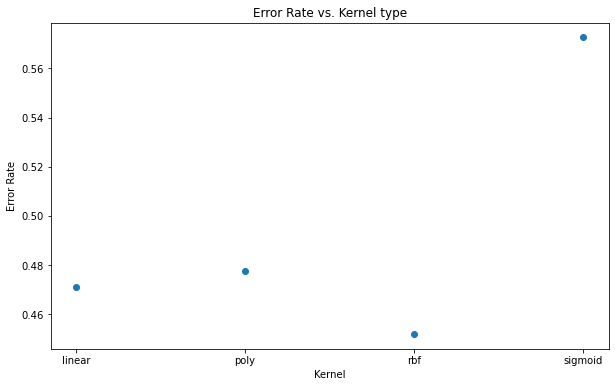

In [ ]:
error_rate=[]

kernellist = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernellist:
    SVM = SVC(kernel = i, random_state = 0)
    SVM.fit(X_train, y_train)
    pred_i = SVM.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

mat.figure(figsize=(10,6))
mat.scatter(kernellist,error_rate)
mat.title('Error Rate vs. Kernel type')
mat.xlabel('Kernel')
mat.ylabel('Error Rate')
mat.savefig("SVM-error.png")

Error rate calculations for the **rbf kernel** in SVM is the lowest.

Now let's test accuracy of the SVM model for different kernels

[0.5290178571428571, 0.5223214285714286, 0.5479910714285714, 0.42745535714285715]


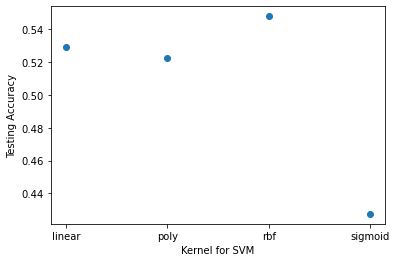

In [ ]:
from sklearn import metrics

scores = []

kernellist = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernellist:
    SVM = SVC(kernel = i, random_state = 0)
    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

mat.scatter(kernellist, scores)
mat.xlabel('Kernel for SVM')
mat.ylabel('Testing Accuracy')
mat.savefig("SVM-accuracy.png")

Again, the **rbf kernel** shows the best accuracy among all.

Hence, I'll implement the **rbf kernel** based SVM Model.

In [ ]:
SVM = SVC(kernel = 'rbf', random_state = 0)
SVM.fit(X_train,y_train)
pred=SVM.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  4 161  50]
 [  3 361  48]
 [ 10 133 126]]
              precision    recall  f1-score   support

           0       0.24      0.02      0.03       215
           1       0.55      0.88      0.68       412
           2       0.56      0.47      0.51       269

    accuracy                           0.55       896
   macro avg       0.45      0.45      0.41       896
weighted avg       0.48      0.55      0.47       896



From the confusion matrix above, we see that our model's accuracy rised to 55% from 53%

Now, it is time to read 2019/2020 groups into the dataset. Unfortunately, Red Star FC and Zenit are not in FIFA 20 dataset, thus their CL groups consist of three teams each in this study.

In [ ]:
cl = pd.read_excel('clgroups1920.xlsx',header=0)
table1=pd.merge(cl, HomeStats,'left', left_on='HomeTeam',right_on='Club')
clmatches=pd.merge(table1, AwayStats,'left',left_on='AwayTeam',right_on='Club')

In [ ]:
clmatches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Group                 84 non-null     object 
 1   HomeTeam              84 non-null     object 
 2   AwayTeam              84 non-null     object 
 3   Club_x                84 non-null     object 
 4   Home Age              84 non-null     float64
 5   Home Overall          84 non-null     float64
 6   Home Potential        84 non-null     float64
 7   Home Crossing         84 non-null     float64
 8   Home Finishing        84 non-null     float64
 9   Home HeadingAccuracy  84 non-null     float64
 10  Home ShortPassing     84 non-null     float64
 11  Home Dribbling        84 non-null     float64
 12  Home LongPassing      84 non-null     float64
 13  Home BallControl      84 non-null     float64
 14  Home Acceleration     84 non-null     float64
 15  Home SprintSpeed      84 

In [ ]:
clmatches=clmatches.drop(['Club_x','Club_y'],axis=1)
clmatches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Group                 84 non-null     object 
 1   HomeTeam              84 non-null     object 
 2   AwayTeam              84 non-null     object 
 3   Home Age              84 non-null     float64
 4   Home Overall          84 non-null     float64
 5   Home Potential        84 non-null     float64
 6   Home Crossing         84 non-null     float64
 7   Home Finishing        84 non-null     float64
 8   Home HeadingAccuracy  84 non-null     float64
 9   Home ShortPassing     84 non-null     float64
 10  Home Dribbling        84 non-null     float64
 11  Home LongPassing      84 non-null     float64
 12  Home BallControl      84 non-null     float64
 13  Home Acceleration     84 non-null     float64
 14  Home SprintSpeed      84 non-null     float64
 15  Home Agility          84 

Normalize the data:

In [ ]:
scaler.fit(clmatches.iloc[:,3:])
tablecl_feat=scaler.fit_transform(clmatches.iloc[:,3:])
Xcl = tablecl_feat
SVMpredcl=SVM.predict(Xcl)

Predict the outcomes and take a look at group A

In [ ]:
clmatches['Results']=SVMpredcl
clresults=clmatches[['Group ','HomeTeam','AwayTeam','Results']]
clresults['Homepts']=0
clresults['Awaypts']=0
clresults['Homepts'][clresults['Results']==1]=3
clresults['Awaypts'][clresults['Results']==2]=3
clresults['Homepts'][clresults['Results']==0]=1
clresults['Awaypts'][clresults['Results']==0]=1
clresults[clresults['Group ']=='A']

/tmp/ipykernel_458395/1964332815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Homepts']=0
/tmp/ipykernel_458395/1964332815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Awaypts']=0
/tmp/ipykernel_458395/1964332815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Homepts'][clr

,Group,HomeTeam,AwayTeam,Results,Homepts,Awaypts
0,A,Paris Saint-Germain,Real Madrid,1,3,0
1,A,Club Brugge KV,Galatasaray SK,1,3,0
2,A,Paris Saint-Germain,Club Brugge KV,1,3,0
3,A,Real Madrid,Galatasaray SK,1,3,0
4,A,Paris Saint-Germain,Galatasaray SK,1,3,0
5,A,Real Madrid,Club Brugge KV,1,3,0
6,A,Real Madrid,Paris Saint-Germain,1,3,0
7,A,Galatasaray SK,Club Brugge KV,1,3,0
8,A,Club Brugge KV,Paris Saint-Germain,2,0,3
9,A,Galatasaray SK,Real Madrid,2,0,3


In [ ]:
hpts=clresults.groupby(['Group ','HomeTeam']).sum()
hpts=hpts.drop(['Awaypts','Results'],axis=1)
apts=clresults.groupby(['Group ','AwayTeam']).sum()
apts=apts.drop(['Homepts','Results'],axis=1)

In [ ]:
hpts.reset_index(inplace=True)
apts.reset_index(inplace=True)
clpred = pd.concat([hpts,apts],axis=1)
clpred['Total Points']=clpred['Homepts']+clpred['Awaypts']
clpred=clpred.drop(columns=['Homepts','Awaypts','AwayTeam'],axis=1)
clpred=clpred.iloc[:,~clpred.columns.duplicated()]
clpred=clpred.groupby(['Group ','HomeTeam']).sum()
clpred.sort_values(['Group ','Total Points'],ascending=False).groupby('Group ').head(4)

Total Points
Group  HomeTeam                          
H      Ajax                            12
       Chelsea                         12
       Valencia CF                     12
       LOSC Lille                       0
G      Olympique Lyonnais               9
       SL Benfica                       6
       RB Leipzig                       3
F      Borussia Dortmund               12
       Inter                           12
       FC Barcelona                     9
       SK Slavia Praha                  0
E      Liverpool                       15
       Napoli                          12
       FC Barcelona                     3
       FC Red Bull Salzburg             3
D      Juventus                        18
       Bayer 04 Leverkusen              9
       Atlético Madrid                  7
       Napoli                           3
C      Manchester City                 15
       Shakhtar Donetsk                 9
       Atalanta                         6
       Dinamo Zagreb                    6
B      FC Bayern München                9
       Tottenham Hotspur                9
       Olympiacos CFP                   0
A      Paris Saint-Germain             15
       Real Madrid                     15
       Club Brugge KV                   3
       Galatasaray SK                   3

Finally, here is the list of teams who will promoted to 2nd round per group predicted by the model with the estimated points:

In [ ]:
clpred.sort_values(['Group ','Total Points'],ascending=False).groupby('Group ').head(2)

Total Points
Group  HomeTeam                         
H      Ajax                           12
       Chelsea                        12
G      Olympique Lyonnais              9
       SL Benfica                      6
F      Borussia Dortmund              12
       Inter                          12
E      Liverpool                      15
       Napoli                         12
D      Juventus                       18
       Bayer 04 Leverkusen             9
C      Manchester City                15
       Shakhtar Donetsk                9
B      FC Bayern München               9
       Tottenham Hotspur               9
A      Paris Saint-Germain            15
       Real Madrid                    15

**Conclusion:**

***What was my aim in this study?***

* I wanted to build a statistical model using match results and team attributes, and use this model to predict Champions Leage 2019/2020 group standings by predicting the outcome each game

***How was the model constructed?***

* I used FIFA 19 player dataset to determine the overall abilities of each team in many dimensions (dribling, shooting, etc.). We used each player's attributes to decide on overall ratings
* I used 2018-2019 football results from major leagues around the world and FIFA 19 dataset to train the model (around 3000 matches) 
* I created fixtures for the teams in CL and merged this table with FIFA 20 dataset so each team's attributes are calculated
* Then I used SVM to build the model and predict the outcome

***What was the outcome of the model?***

* The model provided 55% accuracy which is near to levels achieved by some academic studies as well (https://www.imperial.ac.uk/media/imperial-college/faculty-of-engineering/computing/public/1718-ug-projects/Corentin-Herbinet-Using-Machine-Learning-techniques-to-predict-the-outcome-of-profressional-football-matches.pdf)

***What could be further steps and development areas?***

* Developing a different ML model: A linear regression model to determine how much goals would be scored by each team in each game or a decision tree model could be applied to see the outcomes and the accuracy
* Data manipulation: More data regarding the form of each team, starting elevens, injuries, condition etc. could be added to the initial data for (hopefully) better accuracy. The model then could be runned just before each game to have a more accurate outcome
* Variation of SVC model parameters: For building the model, only the default model parameters for SVC were used. Improvements in accuracy of the model by varying these parameters can be explored.

Please let me know in the comments if your team will make it to the next round or regarding the models itself!

---

## Using Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)
pred=RF.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 42 114  59]
 [ 56 298  58]
 [ 33 107 129]]
              precision    recall  f1-score   support

           0       0.32      0.20      0.24       215
           1       0.57      0.72      0.64       412
           2       0.52      0.48      0.50       269

    accuracy                           0.52       896
   macro avg       0.47      0.47      0.46       896
weighted avg       0.50      0.52      0.50       896



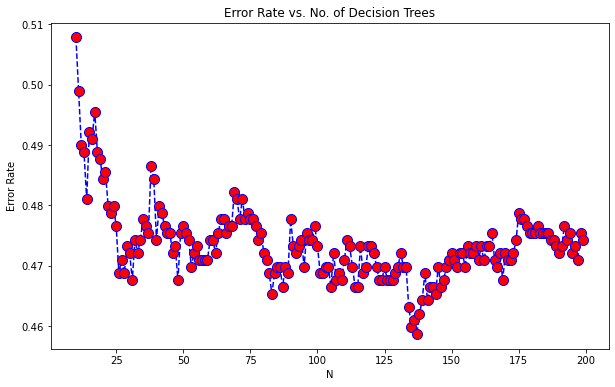

In [ ]:
error_rate=[]
n_range= range(10,200)

for i in n_range:
    
    RF = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
    RF.fit(X_train,y_train)
    pred_i = RF.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

mat.figure(figsize=(10,6))
mat.plot(n_range,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
mat.title('Error Rate vs. No. of Decision Trees')
mat.xlabel('N')
mat.ylabel('Error Rate')
mat.savefig("RF-error.png")

### 

[0.4921875, 0.5011160714285714, 0.5100446428571429, 0.5111607142857143, 0.5189732142857143, 0.5078125, 0.5089285714285714, 0.5044642857142857, 0.5111607142857143, 0.5122767857142857, 0.515625, 0.5145089285714286, 0.5200892857142857, 0.5212053571428571, 0.5200892857142857, 0.5234375, 0.53125, 0.5290178571428571, 0.53125, 0.5267857142857143, 0.5279017857142857, 0.5323660714285714, 0.5256696428571429, 0.5279017857142857, 0.5256696428571429, 0.5223214285714286, 0.5234375, 0.5245535714285714, 0.5133928571428571, 0.515625, 0.5256696428571429, 0.5200892857142857, 0.5212053571428571, 0.5234375, 0.5245535714285714, 0.5245535714285714, 0.5279017857142857, 0.5267857142857143, 0.5323660714285714, 0.5245535714285714, 0.5234375, 0.5245535714285714, 0.5256696428571429, 0.5301339285714286, 0.5279017857142857, 0.5267857142857143, 0.5290178571428571, 0.5290178571428571, 0.5290178571428571, 0.5290178571428571, 0.5256696428571429, 0.5256696428571429, 0.5279017857142857, 0.5245535714285714, 0.5223214285714

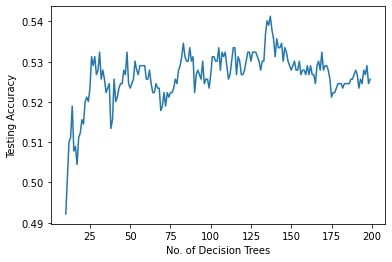

In [ ]:
scores = []

for n in n_range:
    RF = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 0)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

mat.plot(n_range, scores)
mat.xlabel('No. of Decision Trees')
mat.ylabel('Testing Accuracy')
mat.savefig("RF-accuracy.png")

In [ ]:
RF = RandomForestClassifier(n_estimators = 137, criterion = 'entropy', random_state = 0)
RF.fit(X_train,y_train)
pred=RF.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 44 110  61]
 [ 50 307  55]
 [ 38 102 129]]
              precision    recall  f1-score   support

           0       0.33      0.20      0.25       215
           1       0.59      0.75      0.66       412
           2       0.53      0.48      0.50       269

    accuracy                           0.54       896
   macro avg       0.48      0.48      0.47       896
weighted avg       0.51      0.54      0.51       896



From the confusion matrix above, we see that our model's accuracy rised to 54% from 52%

Now, it is time to read 2019/2020 groups into the dataset. Unfortunately, Red Star FC and Zenit are not in FIFA 20 dataset, thus their CL groups consist of three teams each in this study.

In [ ]:
cl = pd.read_excel('clgroups1920.xlsx',header=0)
table1=pd.merge(cl, HomeStats,'left', left_on='HomeTeam',right_on='Club')
clmatches=pd.merge(table1, AwayStats,'left',left_on='AwayTeam',right_on='Club')

In [ ]:
clmatches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Group                 84 non-null     object 
 1   HomeTeam              84 non-null     object 
 2   AwayTeam              84 non-null     object 
 3   Club_x                84 non-null     object 
 4   Home Age              84 non-null     float64
 5   Home Overall          84 non-null     float64
 6   Home Potential        84 non-null     float64
 7   Home Crossing         84 non-null     float64
 8   Home Finishing        84 non-null     float64
 9   Home HeadingAccuracy  84 non-null     float64
 10  Home ShortPassing     84 non-null     float64
 11  Home Dribbling        84 non-null     float64
 12  Home LongPassing      84 non-null     float64
 13  Home BallControl      84 non-null     float64
 14  Home Acceleration     84 non-null     float64
 15  Home SprintSpeed      84 

In [ ]:
clmatches=clmatches.drop(['Club_x','Club_y'],axis=1)
clmatches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Group                 84 non-null     object 
 1   HomeTeam              84 non-null     object 
 2   AwayTeam              84 non-null     object 
 3   Home Age              84 non-null     float64
 4   Home Overall          84 non-null     float64
 5   Home Potential        84 non-null     float64
 6   Home Crossing         84 non-null     float64
 7   Home Finishing        84 non-null     float64
 8   Home HeadingAccuracy  84 non-null     float64
 9   Home ShortPassing     84 non-null     float64
 10  Home Dribbling        84 non-null     float64
 11  Home LongPassing      84 non-null     float64
 12  Home BallControl      84 non-null     float64
 13  Home Acceleration     84 non-null     float64
 14  Home SprintSpeed      84 non-null     float64
 15  Home Agility          84 

Normalize the data:

In [ ]:
scaler.fit(clmatches.iloc[:,3:])
tablecl_feat=scaler.fit_transform(clmatches.iloc[:,3:])
Xcl = tablecl_feat
RFpredcl=RF.predict(Xcl)

Predict the outcomes and take a look at group A

In [ ]:
clmatches['Results']=RFpredcl
clresults=clmatches[['Group ','HomeTeam','AwayTeam','Results']]
clresults['Homepts']=0
clresults['Awaypts']=0
clresults['Homepts'][clresults['Results']==1]=3
clresults['Awaypts'][clresults['Results']==2]=3
clresults['Homepts'][clresults['Results']==0]=1
clresults['Awaypts'][clresults['Results']==0]=1
clresults[clresults['Group ']=='A']

/tmp/ipykernel_449263/2002494399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Homepts']=0
/tmp/ipykernel_449263/2002494399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Awaypts']=0
/tmp/ipykernel_449263/2002494399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Homepts'][clr

,Group,HomeTeam,AwayTeam,Results,Homepts,Awaypts
0,A,Paris Saint-Germain,Real Madrid,1,3,0
1,A,Club Brugge KV,Galatasaray SK,1,3,0
2,A,Paris Saint-Germain,Club Brugge KV,1,3,0
3,A,Real Madrid,Galatasaray SK,1,3,0
4,A,Paris Saint-Germain,Galatasaray SK,1,3,0
5,A,Real Madrid,Club Brugge KV,1,3,0
6,A,Real Madrid,Paris Saint-Germain,1,3,0
7,A,Galatasaray SK,Club Brugge KV,1,3,0
8,A,Club Brugge KV,Paris Saint-Germain,2,0,3
9,A,Galatasaray SK,Real Madrid,2,0,3


In [ ]:
hpts=clresults.groupby(['Group ','HomeTeam']).sum()
hpts=hpts.drop(['Awaypts','Results'],axis=1)
apts=clresults.groupby(['Group ','AwayTeam']).sum()
apts=apts.drop(['Homepts','Results'],axis=1)

In [ ]:
hpts.reset_index(inplace=True)
apts.reset_index(inplace=True)
clpred = pd.concat([hpts,apts],axis=1)
clpred['Total Points']=clpred['Homepts']+clpred['Awaypts']
clpred=clpred.drop(columns=['Homepts','Awaypts','AwayTeam'],axis=1)
clpred=clpred.iloc[:,~clpred.columns.duplicated()]
clpred=clpred.groupby(['Group ','HomeTeam']).sum()
clpred.sort_values(['Group ','Total Points'],ascending=False).groupby('Group ').head(4)

Total Points
Group  HomeTeam                          
H      Ajax                            12
       Chelsea                         12
       Valencia CF                      5
       LOSC Lille                       2
G      SL Benfica                       9
       Olympique Lyonnais               6
       RB Leipzig                       3
F      Borussia Dortmund               12
       Inter                           12
       FC Barcelona                     9
       SK Slavia Praha                  0
E      Napoli                          15
       Liverpool                        9
       FC Red Bull Salzburg             6
       FC Barcelona                     3
D      Juventus                        18
       Bayer 04 Leverkusen             12
       Atlético Madrid                  4
       Napoli                           3
C      Atalanta                        12
       Manchester City                 12
       Shakhtar Donetsk                12
       Dinamo Zagreb                    0
B      FC Bayern München                7
       Tottenham Hotspur                7
       Olympiacos CFP                   3
A      Paris Saint-Germain             15
       Real Madrid                     15
       Club Brugge KV                   3
       Galatasaray SK                   3

Finally, here is the list of teams who will promoted to 2nd round per group predicted by the model with the estimated points:

In [ ]:
clpred.sort_values(['Group ','Total Points'],ascending=False).groupby('Group ').head(2)

Total Points
Group  HomeTeam                         
H      Ajax                           12
       Chelsea                        12
G      SL Benfica                      9
       Olympique Lyonnais              6
F      Borussia Dortmund              12
       Inter                          12
E      Napoli                         15
       Liverpool                       9
D      Juventus                       18
       Bayer 04 Leverkusen            12
C      Atalanta                       12
       Manchester City                12
B      FC Bayern München               7
       Tottenham Hotspur               7
A      Paris Saint-Germain            15
       Real Madrid                    15

**Conclusion:**

***What was my aim in this study?***

* I wanted to build a statistical model using match results and team attributes, and use this model to predict Champions Leage 2019/2020 group standings by predicting the outcome each game

***How was the model constructed?***

* I used FIFA 19 player dataset to determine the overall abilities of each team in many dimensions (dribling, shooting, etc.). We used each player's attributes to decide on overall ratings
* I used 2018-2019 football results from major leagues around the world and FIFA 19 dataset to train the model (around 3000 matches) 
* I created fixtures for the teams in CL and merged this table with FIFA 20 dataset so each team's attributes are calculated
* Then I used Random Forest algorithm to build the model and predict the outcome

***What was the outcome of the model?***

* The model provided 54% accuracy which is near to levels achieved by some academic studies as well (https://www.imperial.ac.uk/media/imperial-college/faculty-of-engineering/computing/public/1718-ug-projects/Corentin-Herbinet-Using-Machine-Learning-techniques-to-predict-the-outcome-of-profressional-football-matches.pdf)

***What could be further steps and development areas?***

* Developing a different ML model: A linear regression model to determine how much goals would be scored by each team in each game or a decision tree model could be applied to see the outcomes and the accuracy
* Data manipulation: More data regarding the form of each team, starting elevens, injuries, condition etc. could be added to the initial data for (hopefully) better accuracy. The model then could be runned just before each game to have a more accurate outcome.

Please let me know in the comments if your team will make it to the next round or regarding the models itself!

---

In [ ]:
#RMSE/MAE computation using sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error

model_scores = dict()

KNNpred=knn.predict(X_test)
model_scores["KNN"] = {"MSE":mean_squared_error(y_test, KNNpred),
                       "RMSE":np.sqrt(mean_squared_error(y_test, KNNpred)),
                       "MAE":mean_absolute_error(y_test, KNNpred)}
RFpred=RF.predict(X_test)
model_scores["RF"] = {"MSE":mean_squared_error(y_test, RFpred),
                      "RMSE":np.sqrt(mean_squared_error(y_test, RFpred)),
                      "MAE":mean_absolute_error(y_test, RFpred)}
SVMpred=SVM.predict(X_test)
model_scores["SVM"] = {"MSE":mean_squared_error(y_test, SVMpred),
                       "RMSE":np.sqrt(mean_squared_error(y_test, SVMpred)),
                       "MAE":mean_absolute_error(y_test, SVMpred)}

In [ ]:
model_scores

{'KNN': {'MSE': 0.7957589285714286,
  'RMSE': 0.8920532094956156,
  'MAE': 0.5747767857142857},
 'RF': {'MSE': 0.7723214285714286,
  'RMSE': 0.8788181999545917,
  'MAE': 0.5736607142857143},
 'SVM': {'MSE': 1.0245535714285714,
  'RMSE': 1.012202337197742,
  'MAE': 0.7232142857142857}}